# 시계열 데이터 분석 기본 모델

* SMA 모델
* WMA 모델
* SES 모델
* ARIMA 모델

### Simple Moving Average

rolling mean 구하는 것이다.

rolling 했을 때 window 사이즈를 결정하고

결정된 사이즈 만큼의 window에 대해서

평균값을 구해서 그 다음 값을 예측하는 것이다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
airline = \
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/airline_passengers.csv',
            index_col = 'Month',
            parse_dates=True)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
airline['6M SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12M SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [ ]:
airline.head(15)

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


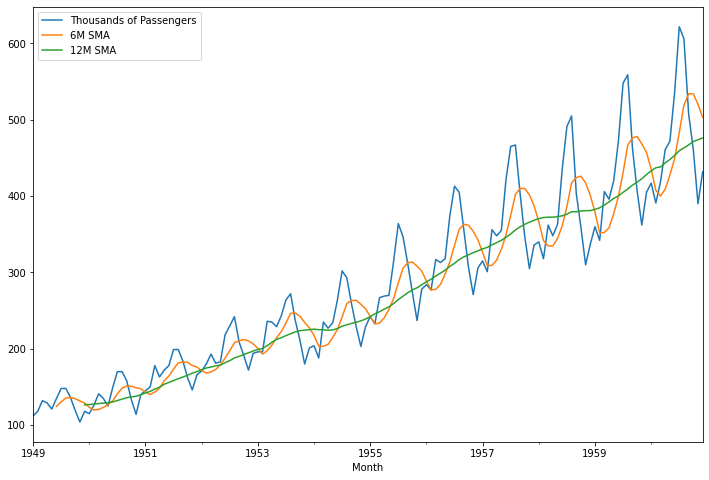

In [ ]:
airline.plot(figsize=(12,8))

In [ ]:
# 성능평가

from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(airline['Thousands of Passengers'],airline['6M SMA']) # 실제값, 예측값

### Weighted Moving Average

window 사이즈가 길어지면 앞쪽에 결측값이 많아지고 트렌드를 늦게 반영해버린다.

그리고 moving average이기 때문에 극단값을 쫓아가질 못한다.

max값이 굉장히 뽀족할 때 평균을 내버리니까 max값보다 훨씬 작은 값만 나올 수 밖에 없어진다.

---

* 이러한 점을 보완하기 위해서 sample에다가 weight(가중치)를 주는 것이다.

* 되도록 제일 최근 것에다가 큰 가중치를 주고 뒤로 갈수록 가중치를 적게준다.

* 제일 최근 것들을 위주로 해서 예측을 수행하고 더 오래된 데이터일 수록 사라지게 만드는 그러한 원리이다.

In [ ]:
airline['WMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline['WMA6'] = airline['Thousands of Passengers'].ewm(span=6).mean()

In [ ]:
# WMA6 : 과거 6개월 텀에 대해서 가중치를 곱해서 만들어진 값
# WMA12 : 과거 1년치 텀에 대해서 가중치를 곱해서 만들어진 값

airline[['Thousands of Passengers','WMA6','WMA12']]

,Thousands of Passengers,WMA6,WMA12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,115.500000,115.250000
1949-03-01,132,122.917431,121.787529
1949-04-01,129,125.266892,124.064224
1949-05-01,121,123.769332,123.231685
...,...,...,...
1960-08-01,606,538.549357,494.898620
1960-09-01,508,529.820969,496.914217
1960-10-01,461,510.157835,491.388952


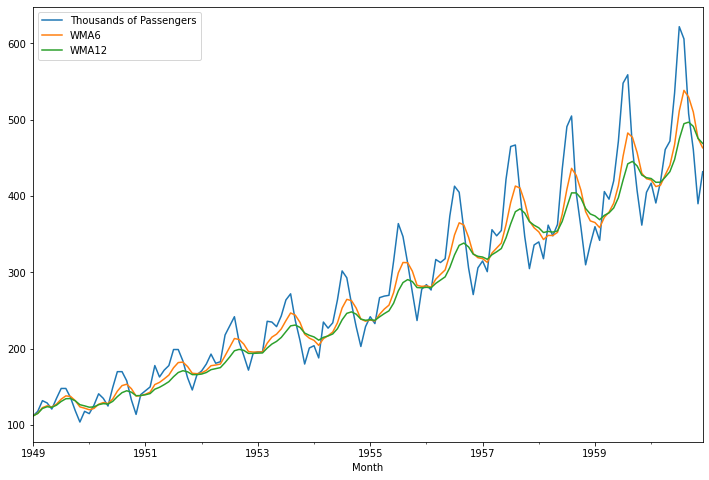

In [ ]:
airline[['Thousands of Passengers','WMA6','WMA12']].plot(figsize=(12,8))

### Simple Exponential Smoothing

아래와 같은 식으로 구한다.

* 미래의 값 = 바로이전예측값 + (가중치 * (바로이전실제값 - 바로이전예측값))

식을 정리하면 아래와 같이 나타낼 수 있다.

* 미래의 값 = 가중치 * 바로이전실제값 + ((1 - 가중치) * 바로이전예측값)

Simple Exponential Smoothing은 Trend와 Seasonality를 반영하지 못한다.

---

이를 보완하는 방법으로 

* Trend를 반영해주는 Holt Exponential Smoothing 기법이 있고,

* Trend와 Seasonality 모두 반영해주는 Holt-Winters Exponential Smoothing 기법이 있다.


In [ ]:
### Simple Exponential Smoothing
### >> Trend와 Seasonality 반영 X

### Holt Exponential Smoothing
### >> Trend만 반영

### Holt-Winters Exponential Smoothing
### >> Trend와 Seasonality 모두 반영 

#### Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
# 데이터 분할
train = airline[:'1959']
test = airline['1960':]

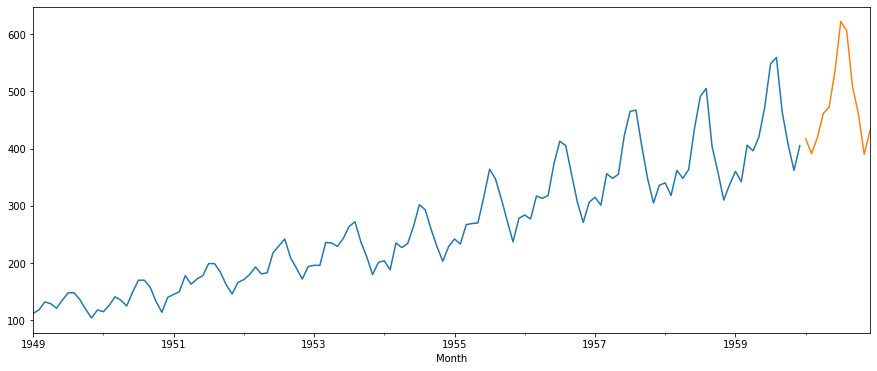

In [ ]:
train['Thousands of Passengers'].plot(figsize=(15,6))
test['Thousands of Passengers'].plot()

In [ ]:
ses_model = \
SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [ ]:
ses_result = ses_model.fit()

In [ ]:
y_hat = test.copy()

In [ ]:
y_hat['SES'] = ses_result.forecast(len(test))

In [ ]:
y_hat

,Thousands of Passengers,6M SMA,12M SMA,WMA12,WMA6,SES
Month,,,,,,
1960-01-01,417,435.500000,433.083333,423.040512,421.138244,405.0
1960-02-01,391,407.500000,437.166667,418.111203,412.527317,405.0
1960-03-01,419,400.166667,438.250000,418.247941,414.376655,405.0
1960-04-01,461,409.166667,443.666667,424.825181,427.697611,405.0
1960-05-01,472,427.500000,448.000000,432.082845,440.355436,405.0
1960-06-01,535,449.166667,453.250000,447.916254,467.396740,405.0
1960-07-01,622,483.333333,459.416667,474.698369,511.569100,405.0
1960-08-01,606,519.166667,463.333333,494.898620,538.549357,405.0
1960-09-01,508,534.000000,467.083333,496.914217,529.820969,405.0


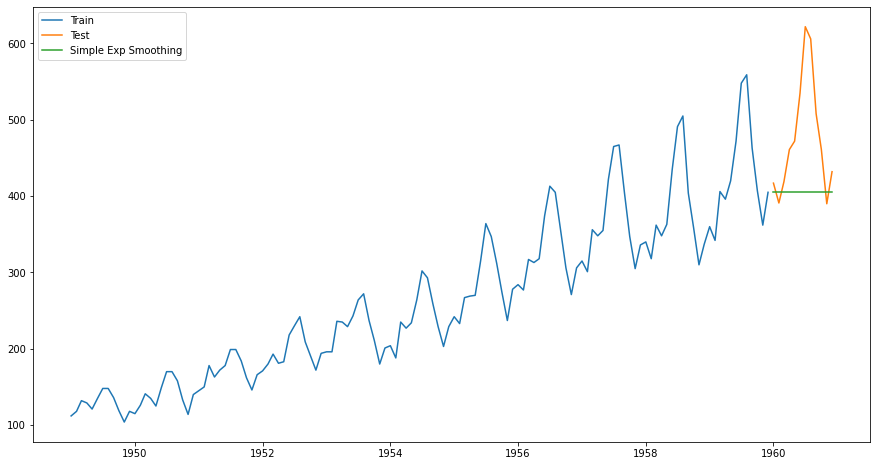

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()

# Trend와 Pattern 모두 반영되지 않았고 이정도 될 것이다 라는 수준만 나온 것을 확인할 수 있다.

In [ ]:
import numpy as np

In [ ]:
# 성능 평가
rmse = \
np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['SES']))

In [ ]:
rmse

102.97653454387881

#### Holt Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import Holt

In [ ]:
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [ ]:
holt_result = holt_model.fit()

In [ ]:
y_hat['HOLT'] = holt_result.forecast(len(test))

In [ ]:
y_hat

,Thousands of Passengers,6M SMA,12M SMA,WMA12,WMA6,SES,HOLT
Month,,,,,,,
1960-01-01,417,435.500000,433.083333,423.040512,421.138244,405.0,407.236628
1960-02-01,391,407.500000,437.166667,418.111203,412.527317,405.0,409.473256
1960-03-01,419,400.166667,438.250000,418.247941,414.376655,405.0,411.709884
1960-04-01,461,409.166667,443.666667,424.825181,427.697611,405.0,413.946512
1960-05-01,472,427.500000,448.000000,432.082845,440.355436,405.0,416.183140
1960-06-01,535,449.166667,453.250000,447.916254,467.396740,405.0,418.419768
1960-07-01,622,483.333333,459.416667,474.698369,511.569100,405.0,420.656396
1960-08-01,606,519.166667,463.333333,494.898620,538.549357,405.0,422.893024
1960-09-01,508,534.000000,467.083333,496.914217,529.820969,405.0,425.129652


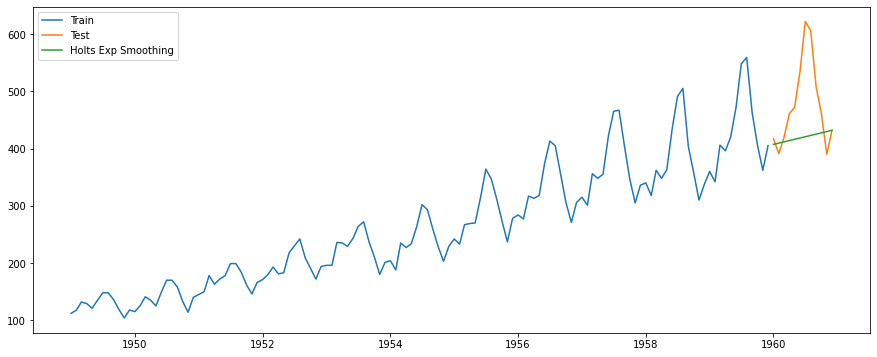

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'], label='Holts Exp Smoothing')
plt.legend()

# Trend를 반영한 결과를 볼 수 있다. 하지만 Seasonality 패턴을 파악을 못한 모습을 확인할 수 있다.

In [ ]:
# 성능 평가
rmse = \
np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['HOLT']))

In [ ]:
rmse

# Trend를 forecast한 만큼 에러가 줄어든 것을 확인할 수 있다.

92.66641919109207

#### Holt-Winters Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
winter_model = \
ExponentialSmoothing(np.asarray(train['Thousands of Passengers']),
                     seasonal_periods=12, trend='add', seasonal='add')

In [ ]:
winter_result = winter_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
y_hat['WINTER'] = winter_result.forecast(len(test))

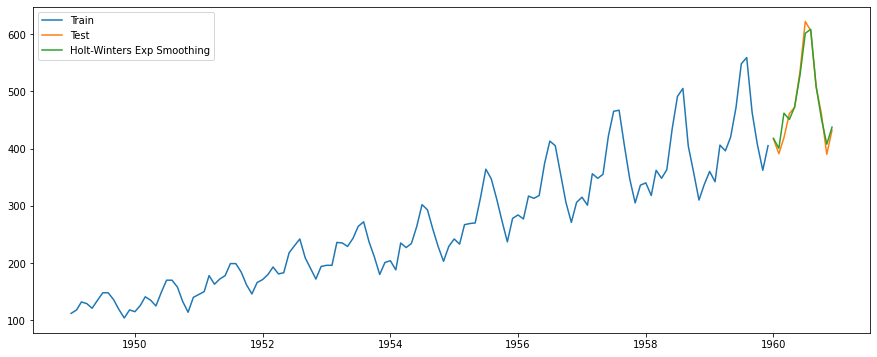

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['WINTER'], label='Holt-Winters Exp Smoothing')
plt.legend()

# Trend와 Seasonality를 반영한 결과를 볼 수 있다. 거의 일치하는 모습이다.

In [ ]:
# 성능 평가
rmse = \
np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['WINTER']))

In [ ]:
rmse

# Trend와 Seasonality를 반영하여 forecast한 만큼 에러가 확실하게 줄어든 것을 확인할 수 있다.

15.570830861607387

### ARIMA 모델

In [ ]:
import statsmodels.api as sm

* ARIMA(p,d,q)(P,D,Q)m

> Trend만 있는 기본 파라미터는 "p, d, q" 가 있다.
>
>Seasonality(계절성)이 포함된다면 "P, D, Q" 가 추가된다.
>
>한 시즌을 이루는 샘플 갯수 "m" 도 있다.

위 파라미터의 조합을 구하는 것이 굉장히 힘들다.

* SARIMAX

> "Seasonality ARIMA X"
>
> 계절성 ARIMAX 모델

In [ ]:
arima = sm.tsa.statespace.SARIMAX(
    train['Thousands of Passengers'], # 학습할 데이터
    order=(2,1,1), # p,d,q 파라미터 설정
    seasonal_order=(0,1,0,12), # P,D,Q,m 파라미터 설정
    enforce_stationarity = False, # 에러 방지
    enforce_invertibility = False # 에러 방지
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
arima_result = arima.fit()



```
arima_result.forecast(파라미터) : 파라미터 = 예측할 데이터의 갯수

arima_result.predict(파라미터) : 파라미터 = 예측할 데이터의 인덱스
```



In [ ]:
y_hat['ARIMA'] = \
arima_result.predict(start='1960-01-01',
                     end='1960-12-01',
                     dynamic = True)

# dynamic = True
# ARIMA 모델은 한 스텝 즉, 바로 다음 스텝만 예측을 할 수 있다.
# 그렇기 때문에 여러번 예측하는데 사용할 수 있도록 dynamic = True를 설정한다.

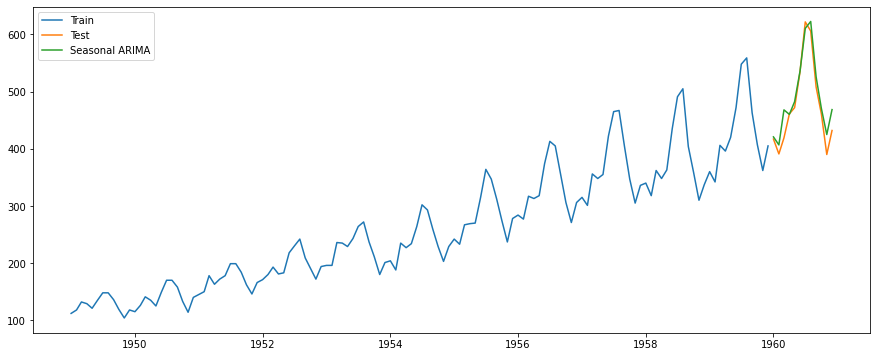

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

# Trend와 Seasonality 모두 잘 따라가는 것을 확인할 수 있다.

In [ ]:
# 성능 평가
rmse = \
np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['ARIMA']))

In [ ]:
rmse

# Holt-Winters Exponential Smoothing 보다는 에러가 크게 나오지만 거의 비슷한 수준이라 성능은 괜찮다고 말할 수 있다.

22.65096428623978